In [1]:
from edgar_prelim import *
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
cik='0000004962'

In [3]:
# Parameters
cik = "0000701853"


# Company

In [4]:
cik_df = pd.read_sql(text("select cik, sic, sic_description, company_name, ticker from cik where cik = :cik").bindparams(cik=cik), prelim_engine)
cik_df.rename({'cik': 'CIK', 'sic': 'SIC', 'sic_description': 'Description', 'company_name': 'Name', 'ticker': 'Ticker'}, axis=1).T.rename({0: ''}, axis=1)

,
CIK,0000701853
SIC,6022
Description,STATE COMMERCIAL BANKS
Name,BANCORPSOUTH INC
Ticker,


In [5]:
prelims = query_prelims(cik)

# Summary Statistics

In [6]:
prelims.groupby('item').item_value.describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
book value per share,25.0,1.657720e+01,1.489518e+00,13.7,1.534000e+01,1.669000e+01,1.779000e+01,1.883000e+01
interest income,20.0,1.234808e+08,1.922721e+07,110599000.0,1.132502e+08,1.180110e+08,1.230555e+08,1.793690e+08
net income,46.0,2.486667e+07,1.185061e+07,-12560000.0,1.973150e+07,2.802150e+07,3.422400e+07,4.012500e+07
net interest income,46.0,1.078756e+08,5.528939e+06,96251000.0,1.049582e+08,1.095195e+08,1.112122e+08,1.205610e+08
provision for loan losses,46.0,1.310441e+07,1.832711e+07,-5000000.0,6.250000e+05,6.000000e+06,1.776500e+07,6.235400e+07


# Plots

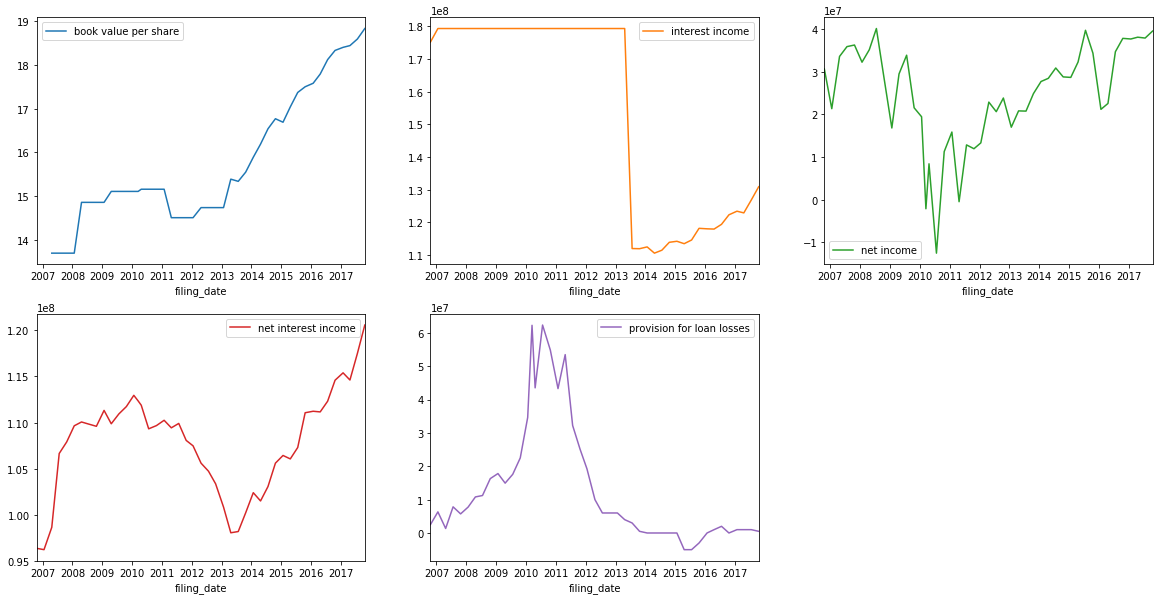

In [7]:
_ = prelims.set_index('filing_date').pivot(columns='item', values='item_value').fillna(method="ffill").plot(subplots=True, layout=(2, 3), figsize=(20, 10), sharex=False)

# Quality

In [8]:
validate_prelims(prelims)

period   msg_type  \
cik        item                                                                 
0000701853 book value per share        2006Q3 to 2006Q4: 2 periods    missing   
           book value per share        2007Q2 to 2007Q4: 3 periods    missing   
           book value per share        2008Q2 to 2008Q4: 3 periods    missing   
           book value per share        2009Q2 to 2009Q4: 3 periods    missing   
           book value per share        2010Q2 to 2010Q4: 3 periods    missing   
           book value per share        2011Q2 to 2011Q4: 3 periods    missing   
           book value per share        2012Q2 to 2012Q4: 3 periods    missing   
           interest income            2007Q1 to 2013Q1: 25 periods    missing   
           net income                                       2009Q4  duplicate   
           provision for loan losses                        2009Q4  duplicate   
           total revenue                                      None      empty   

                                                 message  
cik        item                                           
0000701853 book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           interest income                Missing period  
           net income                   Duplicate period  
           provision for loan losses    Duplicate period  
           total revenue              No values for item

# Data

In [9]:
def make_clickable(val: str) -> str: 
    if isinstance(val, str):
        name, url = val.split('#')
        return f'<a href="{url}">{name}</a>'
    else:
        return ''

(prelims
 .assign(fiscal_period = prelims.fiscal_period.str.cat(prelims.filing_href, sep='#'), filing_date = prelims.filing_date.map(lambda d: d.strftime('%Y-%m-%d')))
 .loc[:, ['filing_date', 'fiscal_period', 'item', 'item_value', 'src_table', 'src_row', 'src_column', 'src_value', 'src_units']]
 .set_index(['filing_date', 'item'])
 .style.format({'fiscal_period': make_clickable})
)

In [10]:
#discard_prelim(cik, date(2019, 12, 31))
#force_reload_prelim(cik, date(2019, 12, 31), delete_filings=False)
#force_reload_prelim_between(cik,  start=date(2002, 6, 1), end=date(2019, 12, 31), delete_filings=False)

In [11]:
#d = date(2018, 10, 29)
#extract_prelim_statements(cik, start=d, end=d)

In [12]:
#d = date(2019, 4, 22)
#filings = query_edgar_for_filings(cik, "8-K", start=d, end=d, require_xbrl=False)
#report = query_edgar_for_submission_text(filings[0].href)
#submission = load_submission(report.href)
#tables = list(parse_tables(submission))
#items_from_tables(tables)

In [13]:
#widget = query_prelims_for_override(cik, filing_date='2006-01-27', item=None)
#widget

In [14]:
#widget.save()